# Environment Setup

#  Environment Setup

In [3]:
# Clone the repo
!git clone https://github.com/Dhanuja-Kavindra/logbert.git

Cloning into 'logbert'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 165 (delta 29), reused 11 (delta 11), pack-reused 78 (from 1)
Receiving objects: 100% (165/165), 389.05 KiB | 11.79 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [4]:
%cd logbert

/content/logbert


In [5]:
!sudo apt-get install python3.8 python3.8-venv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8-distutils
  python3.8-lib2to3 python3.8-minimal
Suggested packages:
  binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8 python3.8-distutils
  python3.8-lib2to3 python3.8-minimal python3.8-venv
0 upgraded, 7 newly installed, 0 to remove and 18 not upgraded.
Need to get 8,013 kB of archives.
After this operation, 22.9 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal amd64 3.8.20-1+jammy1 [2,023 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-stdlib amd64 3.8.20-1+j

In [6]:
# Install system dependencies
!sudo apt-get install build-essential python3.8-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
The following additional packages will be installed:
  libpython3.8 libpython3.8-dev
The following NEW packages will be installed:
  libpython3.8 libpython3.8-dev python3.8-dev
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 6,687 kB of archives.
After this operation, 25.0 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8 amd64 3.8.20-1+jammy1 [1,798 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-dev amd64 3.8.20-1+jammy1 [4,389 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-dev amd64 3.8.20-1+jammy1 [500 kB]
Fetched 6,687 kB in 1s (5,317 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program 

# BGL dataset download

In [7]:
%cd /content/logbert/BGL

/content/logbert/BGL


In [8]:
!chmod +x init.sh  # Make the script executable
!./init.sh         # Initialize folders

In [9]:
!chmod +x /content/logbert/scripts/download_bgl.sh

In [10]:
!/content/logbert/scripts/download_bgl.sh

--2025-01-30 05:16:43--  https://zenodo.org/records/14767417/files/BGL.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31847036 (30M) [application/octet-stream]
Saving to: ‘/root/.dataset/bgl/BGL.tar.gz?download=1’

BGL.tar.gz?download 100%[===================>]  30.37M  17.2MB/s    in 1.8s    

2025-01-30 05:16:45 (17.2 MB/s) - ‘/root/.dataset/bgl/BGL.tar.gz?download=1’ saved [31847036/31847036]

BGL.log


###Start ---for debugging only

In [12]:
!ls /root/.dataset/bgl/

 BGL.log  'BGL.tar.gz?download=1'


###End ---for debugging only

# BGL dataset pre-process

In [13]:
!python data_process.py

Parsing file: /root/.dataset/bgl/BGL.log
Total size after encoding is 2679104 2679601
Parsing done. [Time taken: 0:26:40.292931]
there are 8857 instances (sliding windows) in this dataset

training size 3205
test normal size 4809
test abnormal size 843


In [14]:
!python logbert.py vocab

device cpu
features logkey:True time: False
mask ratio 0.5
arguments Namespace(vocab_size=None, encoding='utf-8', min_freq=1, mode='vocab')
Building Vocab
100% 3205/3205 [00:01<00:00, 3012.84it/s]
vocab_size 119


# Train

In [17]:
!python logbert.py train

device cpu
features logkey:True time: False
mask ratio 0.5
arguments Namespace(mode='train')
Save options parameters
Loading vocab ../output/bgl/vocab.pkl
vocab Size:  119

Loading Train Dataset
before filtering short session
train size  2885
valid size  320
100% 3205/3205 [00:04<00:00, 772.32it/s]
Num of train seqs 1553
Num of valid seqs 320

Loading valid Dataset
Creating Dataloader
Building BERT model
Creating BERT Trainer
Total Parameters: 2171000
Training Start


start calculate center
  0% 0/48 [00:00<?, ?it/s]/content/logbert/BGL/../bert_pytorch/dataset/log_dataset.py:130: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  output["time_input"] = torch.tensor(output["time_input"], dtype=torch.float)
/content/logbert/BGL/../bert_pytorch/dataset/log_dataset.py:130: UserWarning

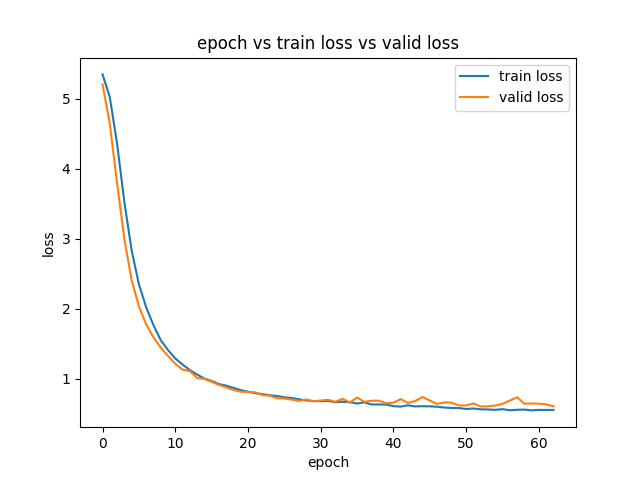

In [18]:
from IPython.display import Image, display

# Path to the saved image
image_path = "/content/logbert/output/bgl/bert/train_valid_loss.png"

# Display the image
display(Image(filename=image_path))


# Test

In [21]:
!python logbert.py predict

device cpu
features logkey:True time: False
mask ratio 0.5
arguments Namespace(mean=0, std=1, mode='predict')
/content/logbert/BGL/../bert_pytorch/predict_log.py:231: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues 

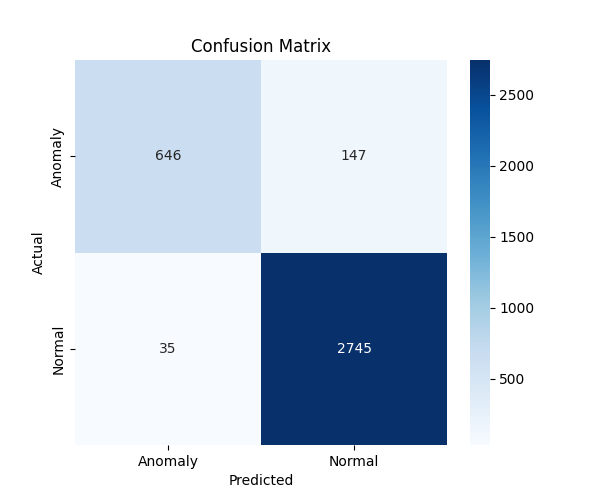

In [22]:
from IPython.display import Image, display

# Path to the saved image
image_path = "/content/logbert/BGL/confusion_matrix.png"

# Display the image
display(Image(filename=image_path))

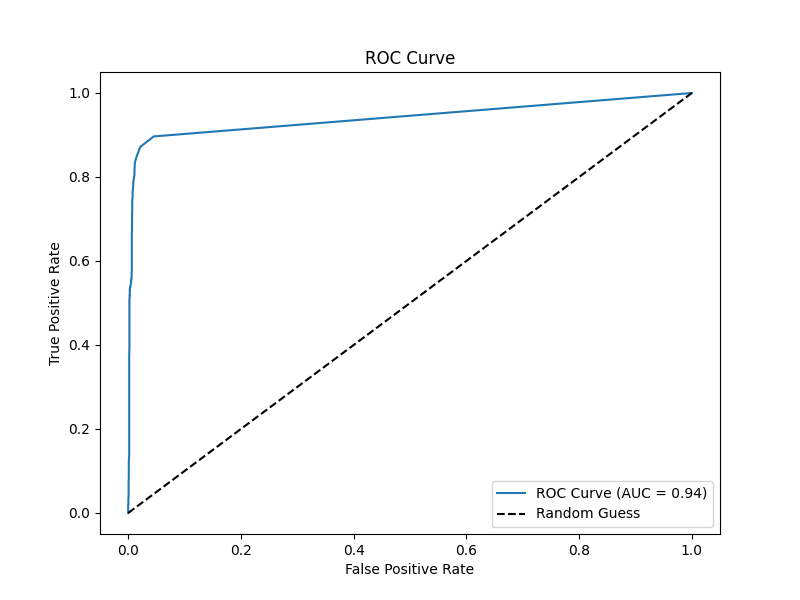

In [23]:
from IPython.display import Image, display

# Path to the saved image
image_path = "/content/logbert/HDFS/roc_curve.png"

# Display the image
display(Image(filename=image_path))

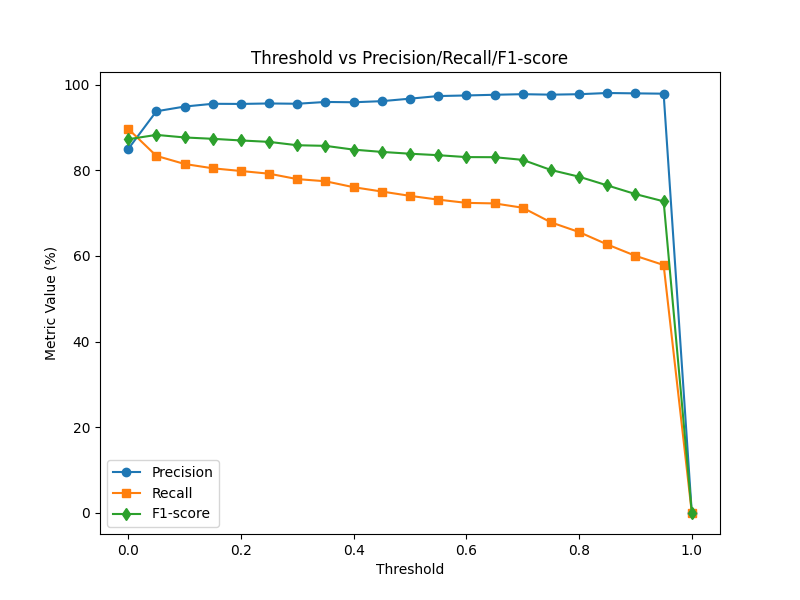

In [24]:
from IPython.display import Image, display

# Path to the saved image
image_path = "/content/logbert/HDFS/metrics_vs_threshold.png"

# Display the image
display(Image(filename=image_path))